In [15]:
import pandas as pd
from load_data import load_data
from convolutional_NN import train_classifier
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss
import time
import numpy as np

SEED = 123
imratio = 0.5
lr = .5e-06
num_epochs = 2
algo_list = [functional_square_loss, functional_square_hinge_loss, naive_square_hinge_loss, naive_square_loss]
str_algo_list = ['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss']
times = pd.DataFrame(0, index=np.arange(num_epochs), columns= str_algo_list)
trainloader, testloader = load_data(SEED, imratio)
for x in range(4):
    print(x)
    for i in range(num_epochs):
        start = time.time()
        train_results = train_classifier(trainloader, testloader, algo_list[x], num_epochs, lr)
        end = time.time()
        times.at[i, str_algo_list[x]] = end - start
times

NUM_SAMPLES: [50000], POS:NEG: [25000 : 25000], POS_RATIO: 0.5000
NUM_SAMPLES: [10000], POS:NEG: [5000 : 5000], POS_RATIO: 0.5000
0
1
2
3


,functional_square_loss,functional_square_hinge_loss,naive_square_hinge_loss,naive_square_loss
0,3,4,102,100
1,3,4,103,101


In [2]:
import numpy as np
idx = np.arange(0,25)
full_dict = dict(zip(idx,train_results))
train_results_df = pd.DataFrame(full_dict[0], index=[0])
for num_epochs in range(1,25):
    temp = pd.DataFrame(full_dict[num_epochs], index=[0])
    combine = [train_results_df, temp]
    train_results_df = pd.concat(combine)
train_results_df

KeyError: 0

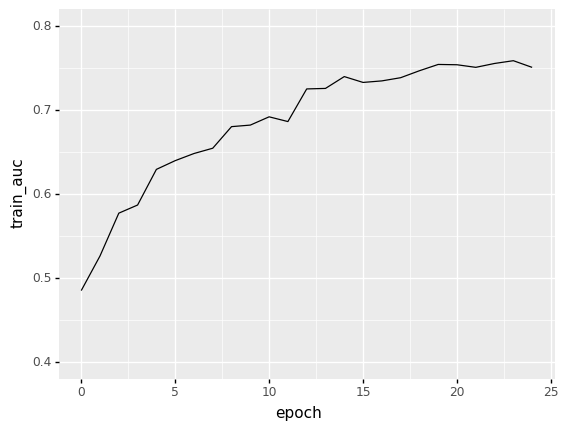

<ggplot: (8728144959946)>

In [10]:
from plotnine import ylim
(ggplot(data=train_results_df)
    + aes(x='epoch',y='train_auc')
    + geom_line()
    + ylim(0.4,0.8))

In [9]:
df = pd.DataFrame(columns=['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss'])
df.append({'functional_square_loss': 10}, ignore_index=True)

,functional_square_loss,functional_square_hinge_loss,naive_square_hinge_loss,naive_square_loss
0,10.0,NaN,NaN,NaN
